In [24]:
# Some Sections of codes in following sections are cited from
# https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
wine = pd.read_csv("wines_SPA.csv")
city = pd.read_csv("City.csv")
wine["region"] = wine["region"].str.lower()
wine["winery"] = wine["winery"].str.lower()
wine["wine"] = wine["wine"].str.lower()
wine["country"] = wine["country"].str.lower()
wine["type"] = wine["type"].str.lower()
import json
l_location = list(city.location)
longi = []
lati = []
for per in l_location:
  per = json.loads(per)
  longi.append(per['latitude'])
  lati.append(per['longitude'])
city['latitude'] = lati
city['longitude'] = longi
# change name
city = city.rename({'name': 'region'}, axis=1)

# change to lower case
city["region"] = city["region"].str.lower()

# collect data from city
city = city.loc[:,('region','latitude','longitude')]
merged = wine.merge(city, how = "inner", on = "region")
merged['year'][merged.year == "N.V."] = None
merged.dropna(inplace = True)
merged.reset_index(inplace = True, drop = True)
dummies = pd.get_dummies(merged[["winery", "type"]]).reset_index(drop = True)
clean = pd.concat([merged, dummies], axis = 1)
clean.drop(["type", "region", "winery","country"], axis = 1, inplace = True)
clean.set_index(['wine'], inplace=True)
clean = clean.astype({'year':'float'})
clean.info()
clean.dropna(inplace = True)

<ipython-input-25-e79f7ecc423f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['year'][merged.year == "N.V."] = None


<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, tinto to juan piernas finca el paso malo monastrell
Columns: 153 entries, year to type_verdejo
dtypes: float64(7), int64(1), uint8(145)
memory usage: 586.8+ KB


clean

In [26]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [27]:
x_columns = clean.columns
x_columns

Index(['year', 'rating', 'num_reviews', 'price', 'body', 'acidity', 'latitude',
       'longitude', 'winery_abel mendoza monge', 'winery_age',
       ...
       'type_monastrell', 'type_red', 'type_rioja red', 'type_rioja white',
       'type_sauvignon blanc', 'type_sparkling', 'type_syrah',
       'type_tempranillo', 'type_toro red', 'type_verdejo'],
      dtype='object', length=153)

In [28]:
x_columns[0]

'year'

In [29]:
clean_col = []
for i in x_columns:
  if i != 'rating':
    clean_col.append(i)
clean_col

['year',
 'num_reviews',
 'price',
 'body',
 'acidity',
 'latitude',
 'longitude',
 'winery_abel mendoza monge',
 'winery_age',
 'winery_allende',
 'winery_alonso & pedrajo',
 'winery_alta alella',
 'winery_altanza',
 'winery_altos de rioja',
 'winery_alvaro palacios',
 'winery_artadi',
 'winery_atalaya',
 'winery_atlan & artisan',
 'winery_azpilicueta',
 'winery_baigorri',
 'winery_barahonda',
 'winery_belondrade',
 'winery_benjamin de rothschild - vega sicilia',
 'winery_berceo',
 'winery_beronia',
 'winery_bodega campo eliseo',
 'winery_bodega contador (benjamin romeo)',
 'winery_bodega elias mora',
 'winery_bodega juan carlos sancha',
 'winery_bodega numanthia',
 'winery_bodegas 6o elemento - vino sexto elemento',
 'winery_bodegas amaren',
 'winery_bodegas ateca',
 'winery_bodegas casa primicia',
 'winery_bodegas el nido',
 'winery_bodegas estraunza',
 'winery_bodegas faustino',
 'winery_bodegas frontaura',
 'winery_bodegas gama',
 'winery_bodegas monte la reina',
 'winery_bodegas 

In [30]:
x_columns

Index(['year', 'rating', 'num_reviews', 'price', 'body', 'acidity', 'latitude',
       'longitude', 'winery_abel mendoza monge', 'winery_age',
       ...
       'type_monastrell', 'type_red', 'type_rioja red', 'type_rioja white',
       'type_sauvignon blanc', 'type_sparkling', 'type_syrah',
       'type_tempranillo', 'type_toro red', 'type_verdejo'],
      dtype='object', length=153)

In [31]:
clean_col = ['year',
 'num_reviews',
 'price',
 'body',
 'acidity',
 'latitude',
 'longitude',
 'winery_abel mendoza monge',
 'winery_age',
 'winery_allende',
 'winery_alonso & pedrajo',
 'winery_alta alella',
 'winery_altanza',
 'winery_altos de rioja',
 'winery_alvaro palacios',
 'winery_artadi',
 'winery_atalaya',
 'winery_atlan & artisan',
 'winery_azpilicueta',
 'winery_baigorri',
 'winery_barahonda',
 'winery_belondrade',
 'winery_benjamin de rothschild - vega sicilia',
 'winery_berceo',
 'winery_beronia',
 'winery_bodega campo eliseo',
 'winery_bodega contador (benjamin romeo)',
 'winery_bodega elias mora',
 'winery_bodega juan carlos sancha',
 'winery_bodega numanthia',
 'winery_bodegas 6o elemento - vino sexto elemento',
 'winery_bodegas amaren',
 'winery_bodegas ateca',
 'winery_bodegas casa primicia',
 'winery_bodegas el nido',
 'winery_bodegas estraunza',
 'winery_bodegas faustino',
 'winery_bodegas frontaura',
 'winery_bodegas gama',
 'winery_bodegas monte la reina',
 'winery_bodegas olarra',
 'winery_bodegas roda',
 'winery_bodegas san roman',
 'winery_bodegas tierra',
 'winery_bodegas valdelana',
 'winery_breca',
 'winery_campillo',
 'winery_carlos moro',
 'winery_carlos serres',
 'winery_casa castillo',
 'winery_casa rojo',
 'winery_castano',
 'winery_castillo de cuzcurrita',
 'winery_contino',
 'winery_cuentavinas',
 'winery_david moreno',
 'winery_de moya',
 'winery_diez caballero',
 'winery_divina proporcion',
 'winery_dominio de anza',
 'winery_dominio del bendito',
 'winery_el coto',
 'winery_enrique mendoza',
 'winery_farina',
 'winery_federico paternina',
 'winery_finca valpiedra',
 'winery_galindo san millan',
 'winery_gomez cruzado',
 'winery_hacienda lopez de haro',
 'winery_hermanos pecina',
 'winery_huerta de albala',
 'winery_imperial',
 'winery_javi revert',
 'winery_javier sanz viticultor',
 'winery_jesus madrazo',
 'winery_jorge piernas',
 'winery_jose pariente',
 'winery_juan gil',
 'winery_la legua',
 'winery_la rioja alta',
 'winery_la vicalanda',
 'winery_lan',
 'winery_lar de paula',
 'winery_loxera',
 'winery_luis canas',
 'winery_marques de caceres',
 'winery_marques de la concordia',
 'winery_marques de murrieta',
 'winery_marques de riscal',
 'winery_marques de tomares',
 'winery_marques de vargas',
 'winery_matsu',
 'winery_miguel merino',
 'winery_mocen',
 'winery_monovar',
 'winery_monte real',
 'winery_muga',
 'winery_murua',
 'winery_murviedro',
 'winery_museum',
 'winery_naia',
 'winery_navajas',
 'winery_olivier riviere',
 'winery_ontanon',
 'winery_orben',
 'winery_ordonez',
 'winery_oxer wines',
 'winery_palacios remondo',
 'winery_penafiel',
 'winery_pintia',
 'winery_proyecto garnachas de espana',
 'winery_pujanza',
 'winery_quinta de la quietud',
 'winery_r. lopez de heredia',
 'winery_ramon bilbao',
 'winery_real de asua',
 'winery_remelluri',
 'winery_remirez de ganuza',
 'winery_rodriguez de vera',
 'winery_rodriguez sanzo',
 'winery_senorio de san vicente',
 'winery_shaya',
 'winery_sierra cantabria',
 'winery_sierra salinas',
 'winery_telmo rodriguez',
 'winery_teso la monja',
 'winery_tobia',
 'winery_torre de ona',
 'winery_valdecuevas',
 'winery_valenciso',
 'winery_valquejigoso',
 'winery_valserrano',
 'winery_vina pomal',
 'winery_vina real',
 'winery_vinedos de paganos',
 'winery_vinicola real',
 'winery_vinos sanz',
 'winery_vinyes del terrer',
 'winery_vivanco',
 'winery_volver',
 'type_grenache',
 'type_monastrell',
 'type_red',
 'type_rioja red',
 'type_rioja white',
 'type_sauvignon blanc',
 'type_sparkling',
 'type_syrah',
 'type_tempranillo',
 'type_toro red']

In [32]:
from scipy.stats import zscore
for i in clean_col:
  clean[i] = zscore(clean[i])

In [33]:
# https://github.com/jeffheaton/t81_558_deep_learning
# Deep Neural Networks with RMSE
df = clean
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#x_columns = df.columns
x = clean[clean_col].values
y = clean['rating'].values
# X = clean[[c for c in clean.columns if c != "rating"]].values
# y = clean["rating"].values
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.20, random_state=42)




In [34]:
# https://github.com/jeffheaton/t81_558_deep_learning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
70/70 - 1s - loss: 14.5212 - val_loss: 8.6585 - 724ms/epoch - 10ms/step
Epoch 2/1000
70/70 - 0s - loss: 4.4070 - val_loss: 1.5995 - 159ms/epoch - 2ms/step
Epoch 3/1000
70/70 - 0s - loss: 1.2758 - val_loss: 0.9199 - 185ms/epoch - 3ms/step
Epoch 4/1000
70/70 - 0s - loss: 0.4895 - val_loss: 0.6587 - 154ms/epoch - 2ms/step
Epoch 5/1000
70/70 - 0s - loss: 0.1866 - val_loss: 0.5694 - 180ms/epoch - 3ms/step
Epoch 6/1000
70/70 - 0s - loss: 0.0872 - val_loss: 0.5414 - 164ms/epoch - 2ms/step
Epoch 7/1000
70/70 - 0s - loss: 0.0501 - val_loss: 0.5358 - 158ms/epoch - 2ms/step
Epoch 8/1000
70/70 - 0s - loss: 0.0339 - val_loss: 0.5308 - 168ms/epoch - 2ms/step
Epoch 9/1000
70/70 - 0s - loss: 0.0242 - val_loss: 0.5365 - 202ms/epoch - 3ms/step
Epoch 10/1000
70/70 - 0s - loss: 0.0179 - val_loss: 0.5295 - 156ms/epoch - 2ms/step
Epoch 11/1000
70/70 - 0s - loss: 0.0136 - val_loss: 0.5327 - 208ms/epoch - 3ms/step
Epoch 12/1000
70/70 - 0s - loss: 0.0117 - val_loss: 0.5296 - 166ms/epoch - 2ms/step

In [35]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

18/18 [==============================] - 0s 1ms/step
Final score (MSE): 0.5271553416600239


In [36]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.7260546409603232


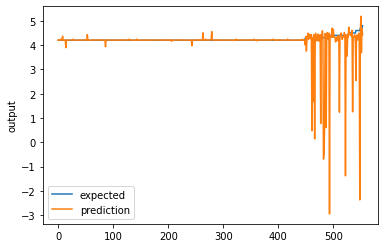

In [37]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(pred.flatten(),y_test)

In [38]:
clean_col = ['year',
 'num_reviews',
 'price',
 'body',
 'acidity',
 'latitude',
 'longitude',
 'type_grenache',
 'type_monastrell',
 'type_red',
 'type_rioja red',
 'type_rioja white',
 'type_sauvignon blanc',
 'type_sparkling',
 'type_syrah',
 'type_tempranillo',
 'type_toro red']

In [39]:
clean = clean.drop_duplicates()

In [40]:
clean

,year,rating,num_reviews,price,body,acidity,latitude,longitude,winery_abel mendoza monge,winery_age,...,type_monastrell,type_red,type_rioja red,type_rioja white,type_sauvignon blanc,type_sparkling,type_syrah,type_tempranillo,type_toro red,type_verdejo
wine,,,,,,,,,,,,,,,,,,,,,
tinto,0.085774,4.9,-0.637668,9.956085,2.520791,0.0466,-2.546473,2.799890,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,-0.019007,-0.032933,-0.0466,3.099870,0
vatan arena tinta de toro,0.232565,4.8,-0.603783,3.387250,2.520791,0.0466,-2.546473,2.799890,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,-0.019007,-0.032933,-0.0466,3.099870,0
tinto,-0.061017,4.8,-0.640895,12.002451,2.520791,0.0466,-2.546473,2.799890,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,-0.019007,-0.032933,-0.0466,3.099870,0
tinto,-0.501389,4.8,-0.650577,9.483847,2.520791,0.0466,-2.546473,2.799890,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,-0.019007,-0.032933,-0.0466,3.099870,0
tinto,-0.207808,4.8,-0.679622,13.104340,2.520791,0.0466,-2.546473,2.799890,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,-0.019007,-0.032933,-0.0466,3.099870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blanc de neu,0.526146,4.3,-0.658645,-0.307333,-5.579872,0.0466,4.431467,2.778449,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,52.611786,-0.032933,-0.0466,-0.322594,0
brega garnacha,0.672937,4.3,-0.219745,-0.192841,2.520791,0.0466,0.858320,2.679463,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,-0.019007,-0.032933,-0.0466,-0.322594,0
atteca armas garnacha old vines,0.672937,4.3,-0.447263,-0.140370,2.520791,0.0466,0.858320,2.679463,-0.038035,-0.019007,...,-0.076235,-0.311558,-1.818344,-0.176875,-0.019007,-0.019007,-0.032933,-0.0466,-0.322594,0


In [41]:
df = clean
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#x_columns = df.columns
x = clean[clean_col].values
y = clean['rating'].values
# X = clean[[c for c in clean.columns if c != "rating"]].values
# y = clean["rating"].values
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.20, random_state=42)
# https://github.com/jeffheaton/t81_558_deep_learning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
15/15 - 1s - loss: 14.4943 - val_loss: 12.9057 - 591ms/epoch - 39ms/step
Epoch 2/1000
15/15 - 0s - loss: 12.4191 - val_loss: 11.0690 - 55ms/epoch - 4ms/step
Epoch 3/1000
15/15 - 0s - loss: 10.6245 - val_loss: 9.6655 - 71ms/epoch - 5ms/step
Epoch 4/1000
15/15 - 0s - loss: 8.8990 - val_loss: 8.5117 - 54ms/epoch - 4ms/step
Epoch 5/1000
15/15 - 0s - loss: 7.3003 - val_loss: 7.6428 - 51ms/epoch - 3ms/step
Epoch 6/1000
15/15 - 0s - loss: 5.8550 - val_loss: 6.7702 - 73ms/epoch - 5ms/step
Epoch 7/1000
15/15 - 0s - loss: 4.4989 - val_loss: 5.5740 - 53ms/epoch - 4ms/step
Epoch 8/1000
15/15 - 0s - loss: 3.2608 - val_loss: 4.3138 - 56ms/epoch - 4ms/step
Epoch 9/1000
15/15 - 0s - loss: 2.1837 - val_loss: 3.1106 - 54ms/epoch - 4ms/step
Epoch 10/1000
15/15 - 0s - loss: 1.3579 - val_loss: 2.3542 - 66ms/epoch - 4ms/step
Epoch 11/1000
15/15 - 0s - loss: 0.8296 - val_loss: 1.7594 - 61ms/epoch - 4ms/step
Epoch 12/1000
15/15 - 0s - loss: 0.5237 - val_loss: 1.3598 - 52ms/epoch - 3ms/step
Epoch 

In [43]:
from sklearn import metrics

# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE) by deep neural network: {}".format(score))

4/4 [==============================] - 0s 3ms/step
Final score (MSE) by deep neural network: 0.299828658973319


In [44]:
# Predict
pred = model.predict(x_test)

# Measure MAE error.  
score = metrics.mean_absolute_error(pred,y_test)
print("Final score (MAE) by deep neural network: {}".format(score))

4/4 [==============================] - 0s 6ms/step
Final score (MAE) by deep neural network: 0.18388938554445228


In [47]:
# Predict
pred = model.predict(x_test)

# Measure MAPE error.  
score = np.mean(np.abs((y_test-pred)/y_test)) * 100
print("Final score (MAPE) by deep neural network: {}".format(score))

4/4 [==============================] - 0s 5ms/step
Final score (MAPE) by deep neural network: 5.420169816814108
